In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Basic info
The following cells inspect basic details about data (column names, types, total number of values, number of NaN values, unique values and total number of unique values per column) 

In [2]:
original_df=pd.read_csv('online_store_revenue.csv')
print(f'Shape of original dataframe: {original_df.shape}')
original_df.head(10)

Shape of original dataframe: (12330, 18)


,AdministrativePage,AdministrativePage_Duration,InformationalPage,InformationalPage_Duration,ProductRelatedPage,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
for column_name in original_df.columns:
    print('\n*********************************')
    print(f'Column name : {column_name}')
    print(f'Column type: {original_df[column_name].dtype}')
    unique_values=original_df[column_name].unique()
    print(f'Number of unique values: {len(unique_values)}')
    print(f'Unique values:{unique_values}')
    null_vals=original_df[column_name].isnull().sum()
    print(f'Total number of NaN values: {null_vals}')


*********************************
Column name : AdministrativePage
Column type: float64
Number of unique values: 28
Unique values:[ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
Total number of NaN values: 14

*********************************
Column name : AdministrativePage_Duration
Column type: float64
Number of unique values: 3337
Unique values:[  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
Total number of NaN values: 14

*********************************
Column name : InformationalPage
Column type: float64
Number of unique values: 18
Unique values:[ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
Total number of NaN values: 14

*********************************
Column name : InformationalPage_Duration
Column type: float64
Number of unique values: 1260
Unique values:[  0.    -1.   120.   ... 547.75 368.25 211.25]
Total number of NaN values: 14

*******************

**Observations:**
* Only page-related columns have a small number of missing values. That rows will be inspected and handled.
* Values of categorical attributes (Month, VisitorType) are clean, meaning there are no typos that must be handled.
* Categorical data must be encoded in order to be used in classification.
* Weekend and Revenue columns (boolean values) will be casted to numberic values.

In [4]:
df_with_nans=original_df[original_df.isnull().any(axis=1)]
print(f'Shape of dataframe with missing values: {df_with_nans.shape}')
df_with_nans

Shape of dataframe with missing values: (14, 18)


,AdministrativePage,AdministrativePage_Duration,InformationalPage,InformationalPage_Duration,ProductRelatedPage,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


**Conclusion:**
All rows with NaN values are overlapping. They all have 0.0 PageValue and represents sessions that finished *without* purchase (no-purchase class). Therefore, it's safe to drop those rows:

In [5]:
cleaned_df=original_df.copy()

# Droping rows with missing values and duplicated rows

cleaned_df.dropna(inplace=True)
cleaned_df.drop_duplicates(inplace=True)
# cleaned_df.head()

print(f'Shape of dataframe after removing rows with missing values and duplicates: {cleaned_df.shape}')

Shape of dataframe after removing rows with missing values and duplicates: (12199, 18)


In [6]:
cleaned_df['Class']=cleaned_df.Revenue
cleaned_df.drop('Revenue', axis=1, inplace=True)

In [7]:
page_types_column_names=['AdministrativePage', 'InformationalPage', 'ProductRelatedPage']
duration_column_names=[f'{col}_Duration' for col in page_types_column_names]
rates_column_names=['BounceRates','ExitRates','PageValues']

numeric_column_names=duration_column_names+rates_column_names+['SpecialDay']
bool_categ_column_names=['Weekend', 'Class']
categ_column_names=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType']

## Exploratory analysis
The following cells inspects basic statistics about numeric attributes, does necessary cleaning of dataset, explores distribution of both categorical and numeric attributes, inspects correlations between atributtes... 

In [8]:
cleaned_df.loc[:,numeric_column_names].describe()

,AdministrativePage_Duration,InformationalPage_Duration,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000
mean,81.682143,34.837336,1207.508189,0.020447,0.041497,5.952500,0.061972
std,177.528168,141.458499,1919.927472,0.045403,0.046247,18.657792,0.199711
min,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,193.583333,0.000000,0.014223,0.000000,0.000000
50%,9.000000,0.000000,609.541667,0.002930,0.025000,0.000000,0.000000
75%,94.750000,0.000000,1477.564759,0.016667,0.048485,0.000000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742,1.000000


**Observations:**
* -1 min value in Page_Duration columns is invalid. That must be inspected and handled.
* distributions of Page_Duration attributes are very asymmetrical (skewed to the right: $mean>>median$)
* distributions of BounceRates, ExitRates and PageValues are also skewed to the right

In [9]:
cond1=(cleaned_df.AdministrativePage_Duration < 0)
cond2=(cleaned_df.InformationalPage_Duration < 0)
cond3=(cleaned_df.ProductRelatedPage_Duration < 0)
invalid_duration_df=cleaned_df.loc[cond1 | cond2 | cond3]
print(f'Shape of dataframe containing only invalid duration values: {invalid_duration_df.shape}')
print(f'Unique values of session classes:{invalid_duration_df.Class.unique()}')

Shape of dataframe containing only invalid duration values: (33, 18)
Unique values of session classes:[False]


**Conclusion:** Each row with one of the negative PageDuration belongs to no-purchase class. Thus, those rows can be safely deleted: 

In [10]:
cleaned_df=cleaned_df.loc[~cleaned_df.index.isin(invalid_duration_df.index)]
print(f'Shape of dataframe after removing invalid duration values: {cleaned_df.shape}')

Shape of dataframe after removing invalid duration values: (12166, 18)


In [11]:
cleaned_df.groupby('Class').mean().loc[:,numeric_column_names]
# .loc[:,numeric_column_names].describe()

,AdministrativePage_Duration,InformationalPage_Duration,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Class,,,,,,,
False,74.917083,30.716618,1087.016713,0.022779,0.045104,2.007589,0.069234
True,119.483244,57.611427,1876.209615,0.005117,0.019555,27.264518,0.023166


After grouping data to both distinct classes of sessions and aggregating with mean, the following results were obtained:
* For each page type, mean value of duration is longer for sessions that finished with purchase than those that didn't
* BounceRate and ExitRate are lower for sessions that finished with purchase
* Pages with higher PageValue are more likely to lead to purchase when visited in a session
* Surprisingly, sessions closer to holidays are more likely to finish without purchase 

In [12]:
# Save cleaned dataset to .csv file
cleaned_df.to_csv('cleaned_online_store_revenue.csv')

In [13]:
cleaned_df.loc[:,numeric_column_names].describe()

,AdministrativePage_Duration,InformationalPage_Duration,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12166.000000,12166.000000,12166.000000,12166.000000,12166.000000,12166.000000,12166.000000
mean,81.906417,34.934544,1210.786240,0.020009,0.041097,5.968646,0.062009
std,177.716486,141.637904,1921.496348,0.044578,0.045630,18.680501,0.199815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,196.500000,0.000000,0.014178,0.000000,0.000000
50%,10.000000,0.000000,612.784722,0.002865,0.025000,0.000000,0.000000
75%,95.000000,0.000000,1481.845834,0.016324,0.048123,0.000000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742,1.000000


# Distribution of values

In [14]:
from sklearn.preprocessing import StandardScaler

def plot_class_distribution(df, class_column='Class'):
    true_class_df=df[df[class_column]==True]
    false_class_df=df[df[class_column]==False]
    count_true = len(true_class_df)
    count_false = len(false_class_df)
    pct_of_true = count_true/(count_false+count_true)
    pct_of_false = count_false/(count_false+count_true)
    print('Percentage of sessions in purchase class is {:.2f} %'.format(pct_of_true*100))
    print('Percentage of sessions in no-purchase class is {:.2f} %'.format(pct_of_false*100))

    sns.countplot(x='Class', data=cleaned_df, palette='hls');
    plt.show()
    
def plot_distribution_categorical(columns_list, df, column_class='Class'):
    fig = plt.figure(figsize=(20,40))
    fig.subplots_adjust(wspace=0.2,hspace=0.5)
    num_of_rows=len(columns_list)
    num_of_cols=2
    for i, column_name in enumerate(columns_list):
        ax_full=fig.add_subplot(num_of_rows, num_of_cols, 2*i+1)
        ax_scaled=fig.add_subplot(num_of_rows,num_of_cols,2*i+2)
        table=pd.crosstab(df[column_name], df[column_class])
        table.plot(kind='bar', ax=ax_full, colormap='summer')
        table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', ax=ax_scaled, stacked=True, colormap='summer')
    plt.show()

def plot_hist_numeric(columns_list, df, class_column='Class'):
    fig = plt.figure(figsize=(20,40))
    fig.subplots_adjust(wspace=0.2,hspace=0.5)
    num_of_plots=len(columns_list)
    for i, column_name in enumerate(columns_list):
        dist_plot=plt.subplot(num_of_plots, 1, i+1, title=column_name)
        cond = df[class_column]==True
        yes_class_col_vals=df[cond][column_name]
        no_class_col_vals=df[~cond][column_name]
        sns.distplot(no_class_col_vals)
        sns.distplot(yes_class_col_vals)
        fig.legend(labels=['NO_PURCHASE','PURCHASE'], loc='best')
    plt.show()

def plot_box_class_numeric(columns_list, df, class_column='Class'):
    std_scal=StandardScaler()
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2,hspace=0.5)
    num_of_plots=len(columns_list)
    num_of_cols=2
    for i, column_name in enumerate(columns_list):
        box_plot=plt.subplot(num_of_plots, num_of_cols, 2*i+1, title=f'Box plot of values in {column_name} in purchase class')
        cond = df[class_column]==True
        yes_data = np.array(df[cond][column_name]).reshape(-1,1)
        standardized_yes_data=std_scal.fit_transform(yes_data)
        sns.boxplot(standardized_yes_data, color='#83B186')
        
        box_plot=plt.subplot(num_of_plots, num_of_cols, 2*i+2, title=f'Box plot of values in {column_name} in no-purchase class')
        no_data=np.array(df[~cond][column_name]).reshape(-1,1)
        standardized_no_data=std_scal.fit_transform(no_data)
        sns.boxplot(standardized_no_data, color='#E56D5A')
    plt.show()
    
def plot_box_numeric(columns_list, df):
    std_scal=StandardScaler()
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(wspace=0.2,hspace=0.5)
    num_of_plots=len(columns_list)
    for i, column_name in enumerate(columns_list):
        box_plot=plt.subplot(num_of_plots, 1, i+1, title=f'Box plot of values in {column_name}')
        data = np.array(df[column_name]).reshape(-1,1)
        standardized_data=std_scal.fit_transform(data)
        sns.boxplot(standardized_data, color='#83B186')
    plt.show()
        
def plot_pair_plot(subset_columns_list, df, class_column='Class'):
    subset_df=df[subset_columns_list]
    subset_df[class_column]=df[class_column].astype(str)
    sns.pairplot(subset_df, hue=class_column, diag_kind = 'kde',
                 plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                 size = 4);
    
def plot_corr_matrix(subset_columns_list, df):
    corr_numeric=df[subset_columns_list].corr()
    fig=plt.subplots(figsize=(11,11))
    sns.heatmap(corr_numeric, annot=True, square=True, cbar=True, linewidths=.5)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

### Distribution of session classes:

Percentage of sessions in purchase class is 15.68 %
Percentage of sessions in no-purchase class is 84.32 %


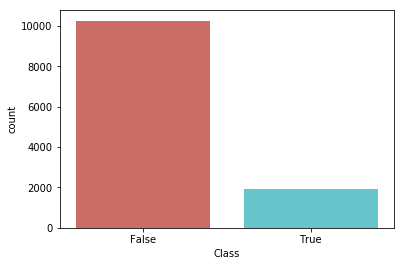

In [15]:
true_class_df=cleaned_df[cleaned_df.Class==True]
false_class_df=cleaned_df[cleaned_df.Class==False]

plot_class_distribution(cleaned_df)

**Observations:** 
Session classes are not balances; data is more biased towards no-purchase class. Data will be balanced before model training.

### Distribution of categorical variables:

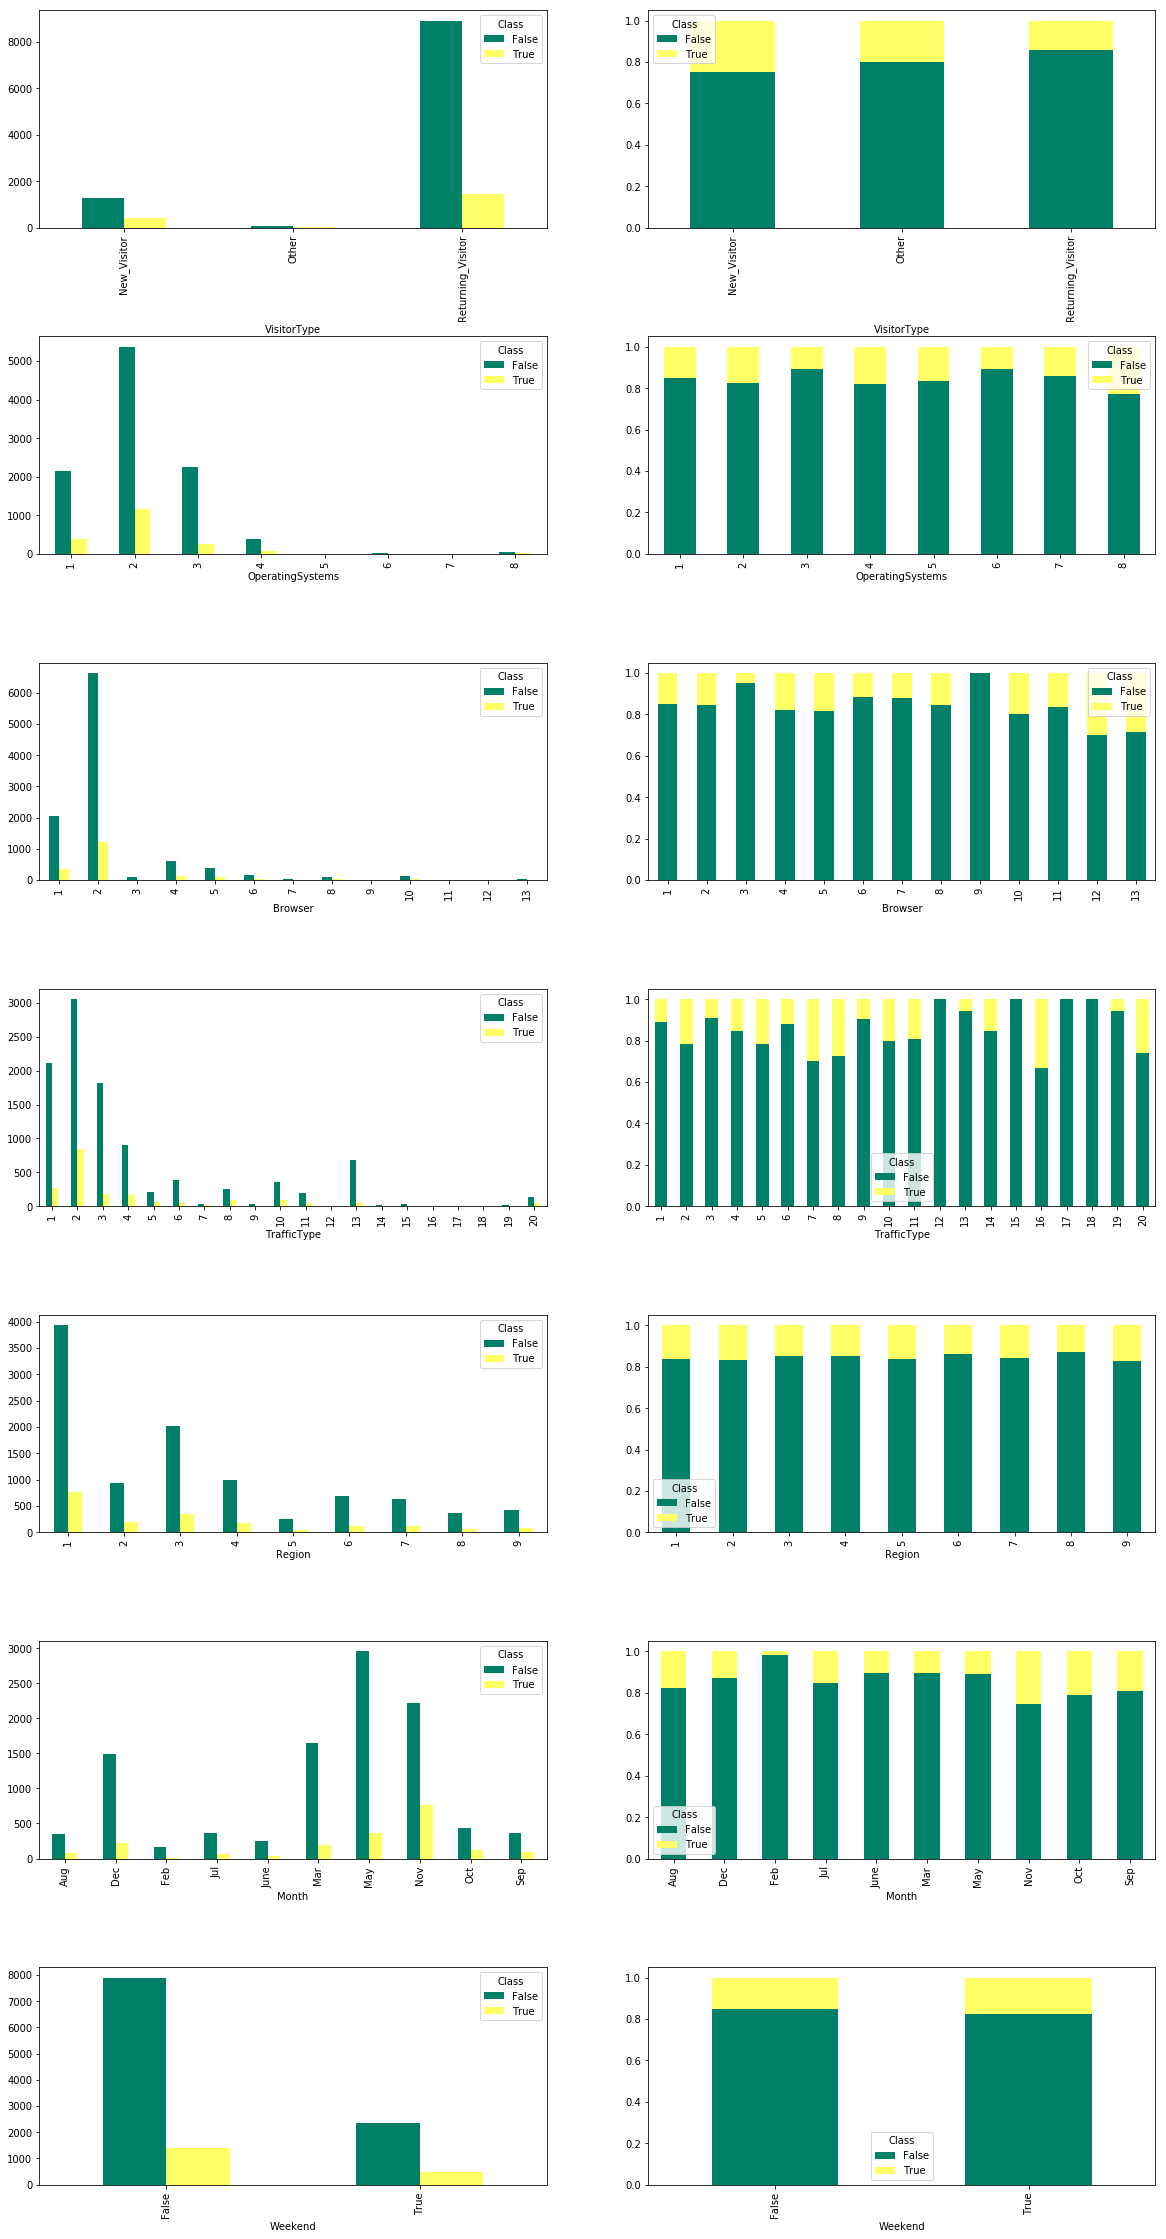

In [16]:
categorical_columns=['VisitorType', 'OperatingSystems', 'Browser', 'TrafficType', 'Region', 'Month', 'Weekend']

plot_distribution_categorical(categorical_columns, cleaned_df)

**Observations:** 
* VisitorType: 
    * There is small amount of visitors that are neither new nor returning
    * New visitors are more likely to finish session with purchase than returning visitors. 
* Operating System:
    * Operating System 2 has twice as mush users than OS 1 and 2
    * OS type is not strong indicator of whether session will finish with purchase.
* Browser:
    * Most of the users are using Browser 2
    * Type of browser can slightly influence user's decision
* TrafficType:
    * TrafficTypes 1-4 are the most frequent ones.
    * TrafficTypes seems to considerably influence user's final decision to purchase product
* Region:
    * The most of the users are from region 1
    * Considerable amount of users are from regions 2, 3, 4
    * Users from all regions are equally likely to finish session with purchase
* Month:
    * Sessions are the most frequent in May, November, March and December (in that order)
    * November seems to be the month when sessions are most likely to finish with purchase
    * Month attribute greately influence the outcome
* Weekend:
    * As expected, more sessions are done on weekdays
    * Slightly more percentage of sessions will finish with purchase on weekends than on weekdays.

### Distribution of numeric values:

In [17]:
cleaned_df.head()

,AdministrativePage,AdministrativePage_Duration,InformationalPage,InformationalPage_Duration,ProductRelatedPage,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Class
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


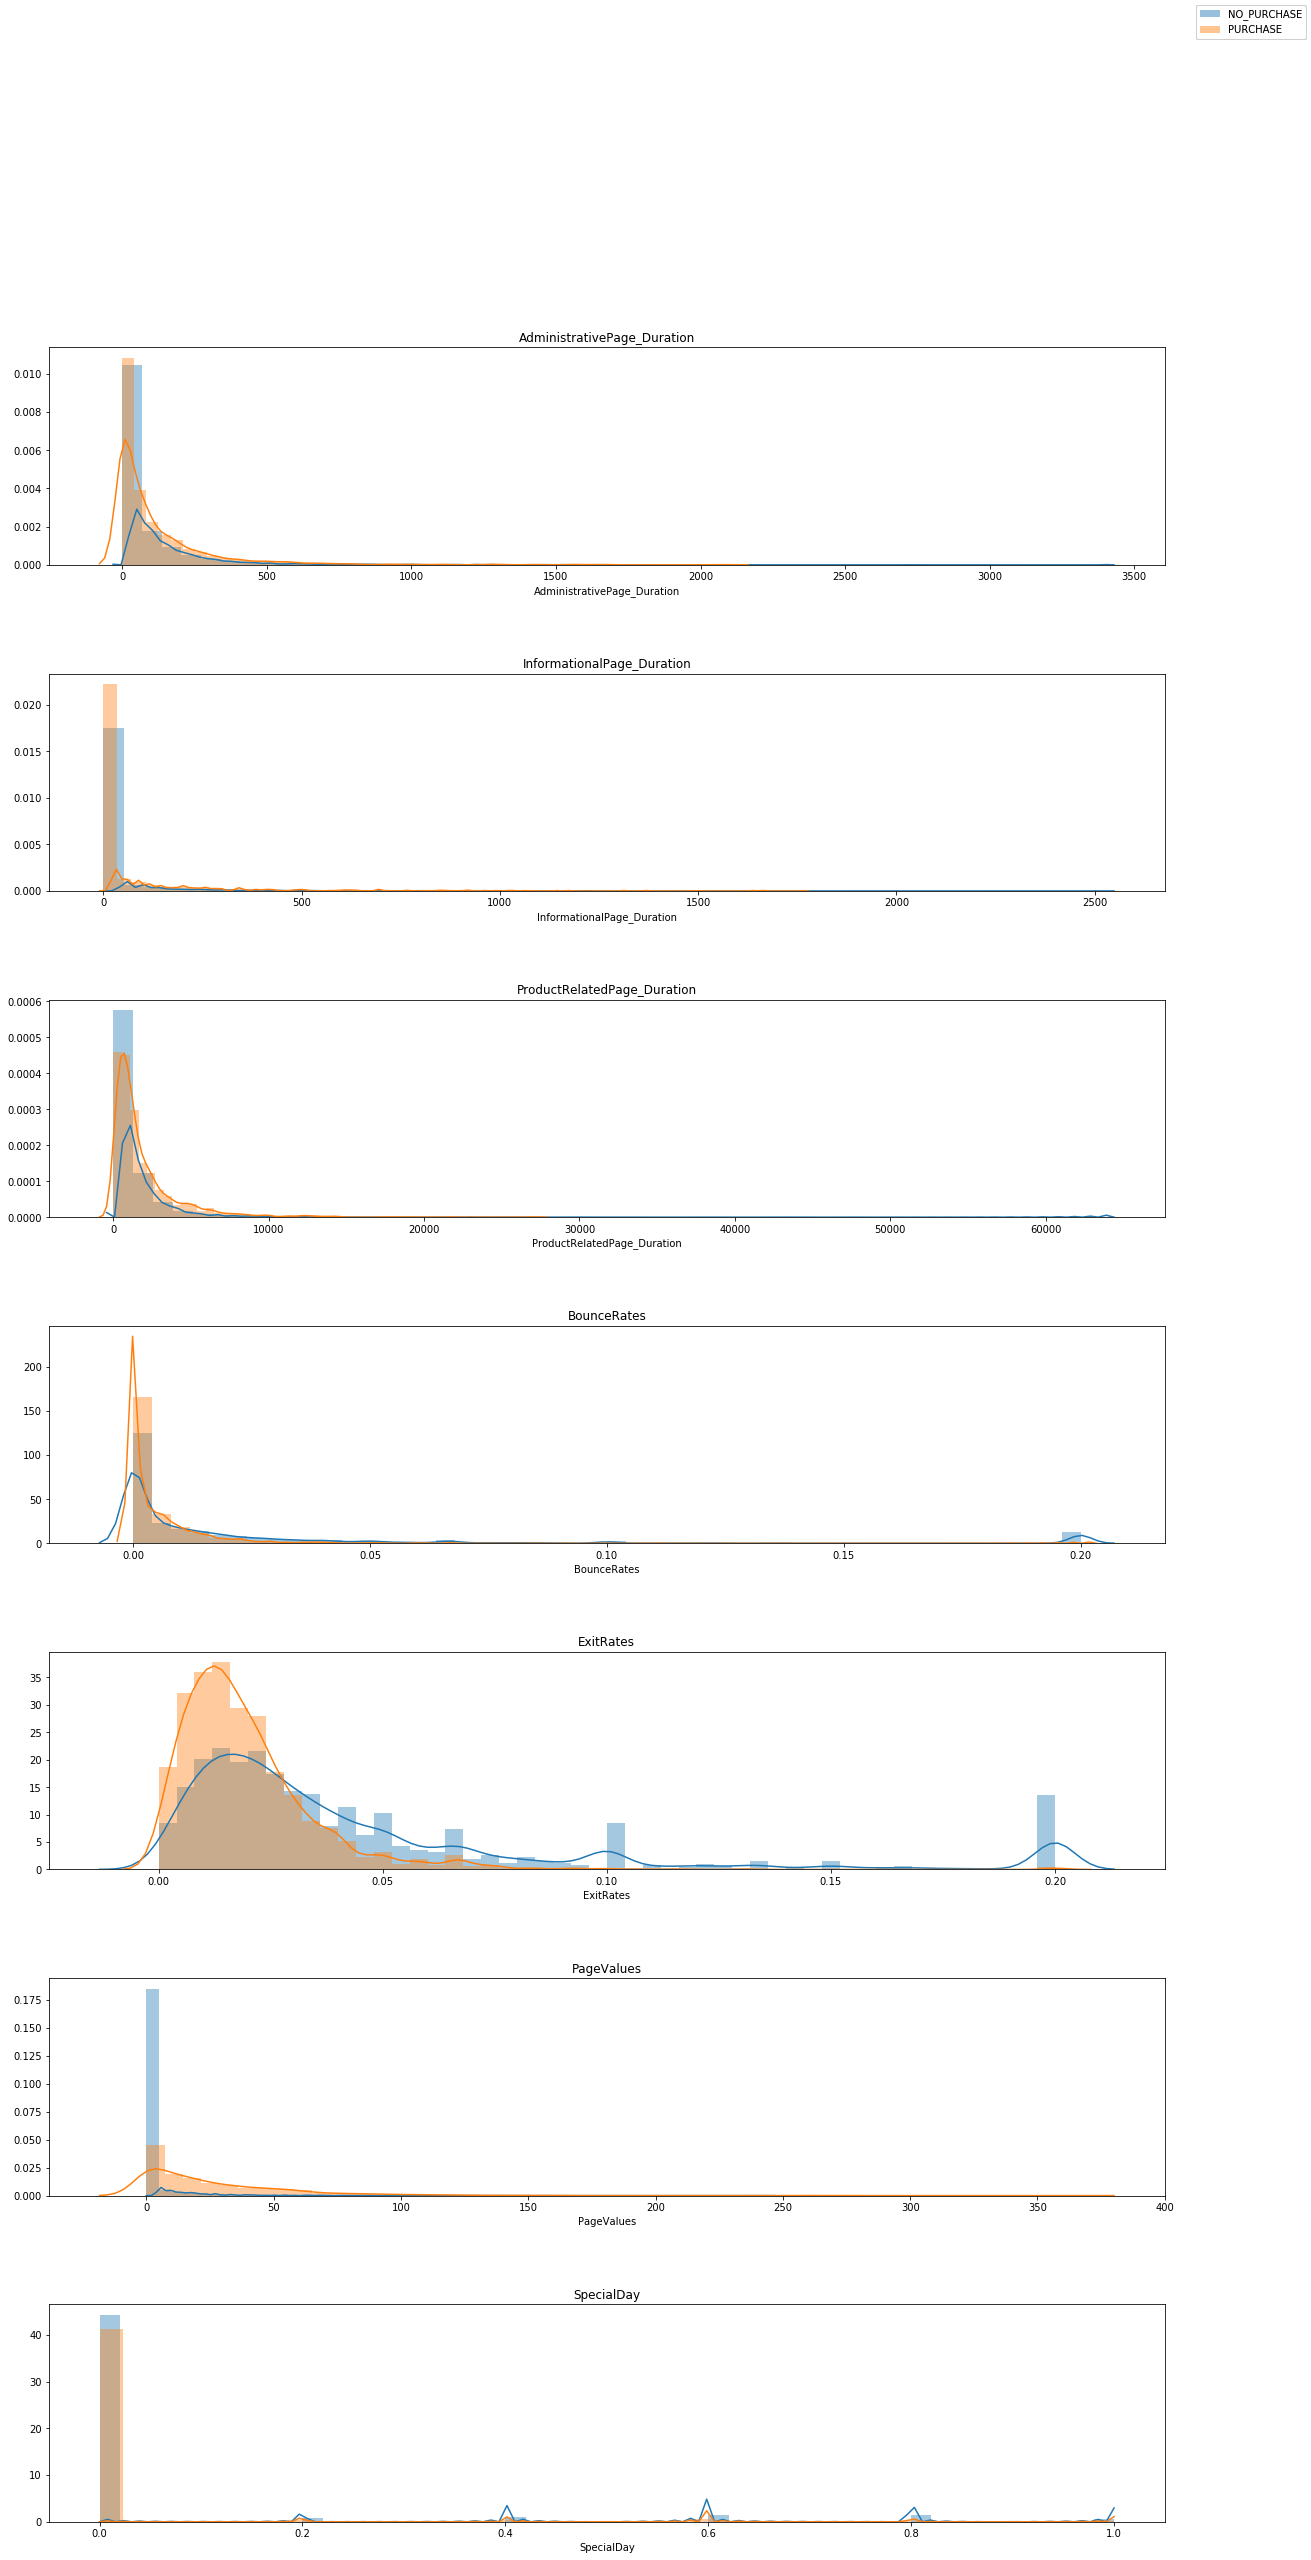

In [18]:
plot_hist_numeric(numeric_column_names, cleaned_df)

**Observations:**
* PageDuration:
    * Values are skewed to the right.
    * In order to visualize data more transparently, values will be transformed using logarithmic function to get normal distribution.
    * Most of the values are grouped around 0.
    * Usually sessions from purchase class have shorter durations. 
* ExitRates:
    * Values have multimodal distribution.
    * Values from False class grouped around higher values of exit rate are creating additional peaks, probably outliers.
* PageValues:
    * More sessions from False class have significantly lower page value.
    * Sessions that have very high page value are usually in purchase class.
* SpecialDay:
    * (as expected) Most of the sessions are far from holidays.

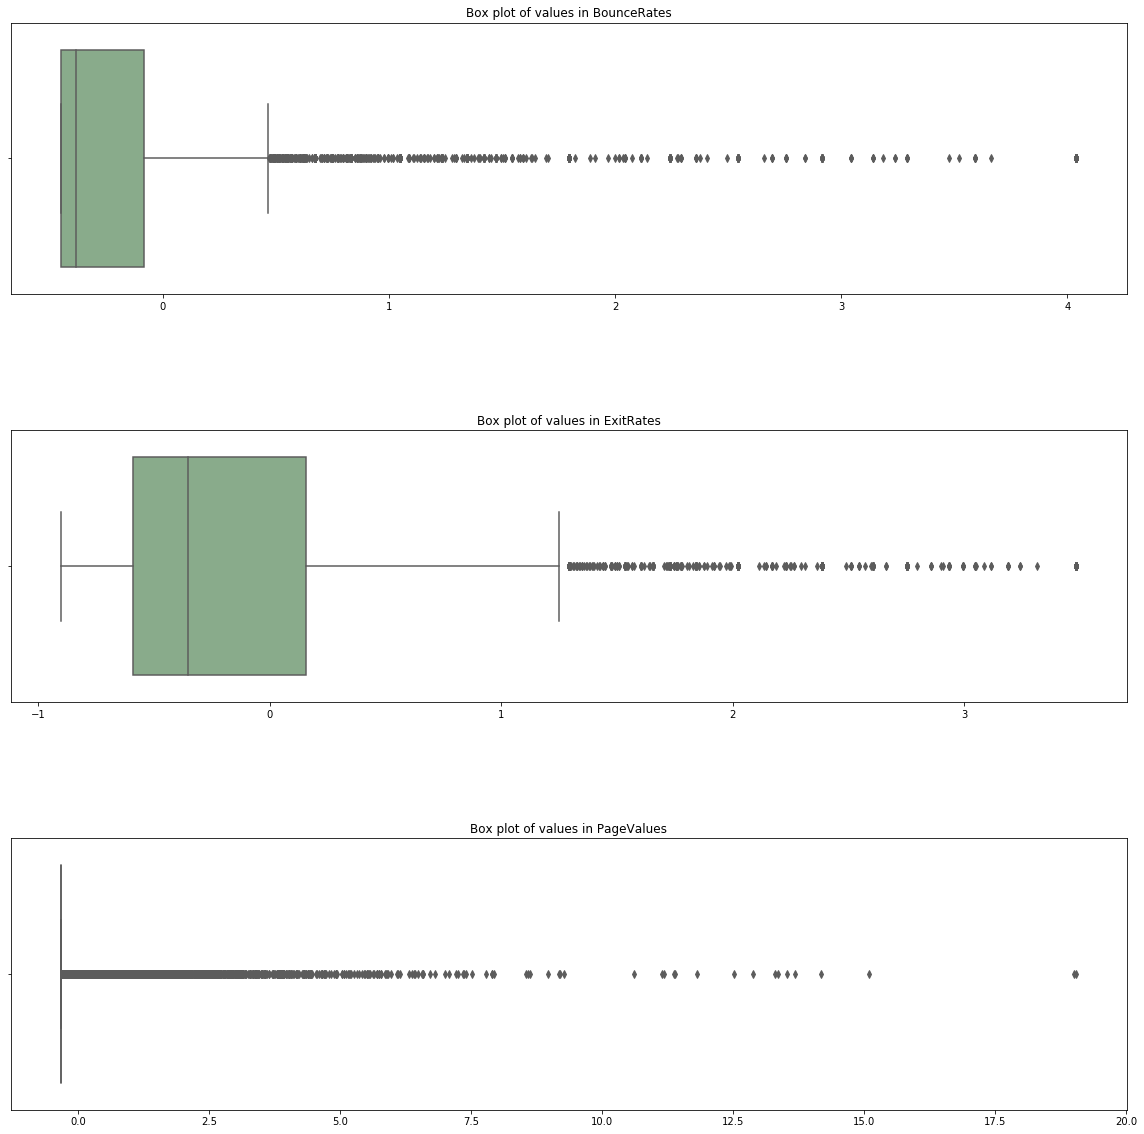

In [19]:
plot_box_numeric(rates_column_names, cleaned_df)

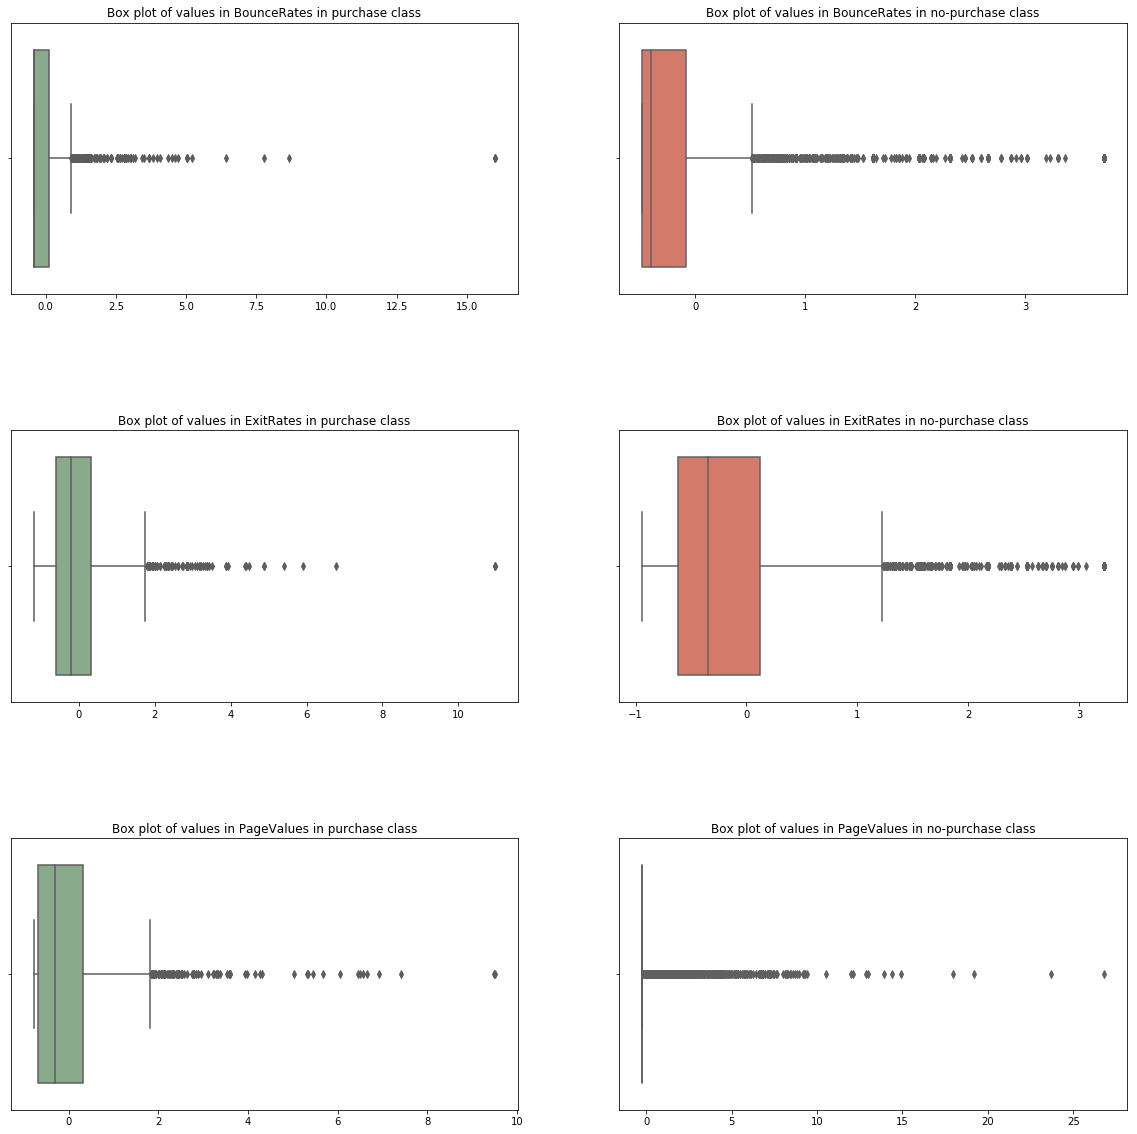

In [20]:
plot_box_class_numeric(rates_column_names, cleaned_df)

**Conclusions:**
* Outliers threshold for standardized values of numeric attributes:
    * BounceRates: 2
    * ExitRates: 2
    * PageValues: 4

### Correlations between attributes:

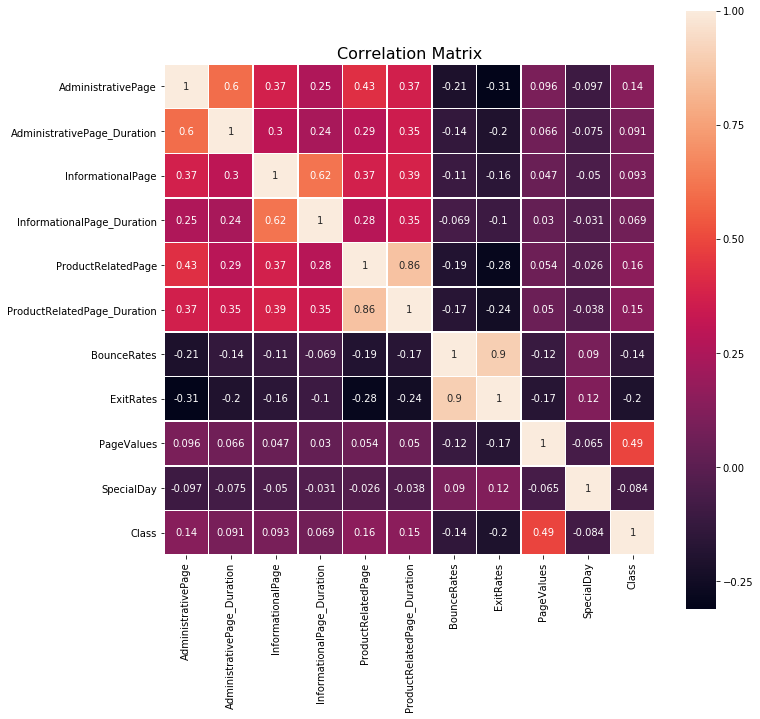

In [21]:
subset_cols=cleaned_df.columns[:10].tolist()+['Class']
plot_corr_matrix(subset_cols, cleaned_df)

**Observations:**
* Multicollinearity in data should be removed
* High correlation between attributes:
    * Page types and Page durations
    * BounceRate and ExitRate

## Data preparation
Using information gained in the previous section:
* Removing outliers from numeric columns
* Removing multicollinearity in the dataset
* Encoding categorical data
* Balancing no-purchase and purchase class using SMOTE algorithm

In [22]:
final_df=cleaned_df.copy()

In [23]:
def _log_transform_col_values(df, columns_list):
    for col in columns_list:
        log_data=np.log10(df[col]+1).replace(-np.inf, np.nan)
        df[f'log_{col}']=log_data
    new_df=df.dropna()
    return new_df

def rm_outliers(df, columns_list):
    #Log transform data in order to obtain normal distribution, 
    #and remove outliers using interquartile range on tranformed data
    
    df=_log_transform_col_values(df, columns_list)
    for col in columns_list:
        q1=df[f'log_{col}'].quantile(0.25)
        q3=df[f'log_{col}'].quantile(0.75)

        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr

        print(f'Lower point: {round(lower, 2)} \t upper point: {round(upper, 2)} \t {col}')

        if lower==upper:
            continue

        cond = (df[f'log_{col}'] >= lower) & (df[f'log_{col}'] <= upper)
        df = df[cond]

In [24]:
final_df.head()

,AdministrativePage,AdministrativePage_Duration,InformationalPage,InformationalPage_Duration,ProductRelatedPage,ProductRelatedPage_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Class
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


**Removing multicollinearity:**

In [25]:
# Removing page types attributes, highly correlated to PageDuration attributes
final_df.drop(page_types_column_names, axis=1, inplace=True)

# Removing BounceRates attribute which is highly correlated to ExitRates
final_df.drop('BounceRates', axis=1, inplace=True)

In [26]:
numeric_column_names.remove('BounceRates')
rates_column_names.remove('BounceRates')
final_df.head()

,AdministrativePage_Duration,InformationalPage_Duration,ProductRelatedPage_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Class
0,0.0,0.0,0.000000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,64.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,2.666667,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,627.500000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,154.216667,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


**Removing outliers:**

In [27]:
# Remove outliers from page duration attributes
rm_outliers(final_df, duration_column_names)

Lower point: -2.97 	 upper point: 4.96 	 AdministrativePage_Duration
Lower point: 0.0 	 upper point: 0.0 	 InformationalPage_Duration
Lower point: 0.98 	 upper point: 4.48 	 ProductRelatedPage_Duration


In [28]:
final_df.head()
for col in duration_column_names:
    numeric_column_names.append(f'log_{col}')

In [29]:
# Remove rows with standardized ExitRate greater than 2

std_scal=StandardScaler()
for col_name, outlier_threshold in zip(['ExitRates', 'PageValues'], [2,4]):
    final_df[f'std_{col_name}']=std_scal.fit_transform((np.array(final_df[col_name]).reshape(-1,1)))
    cond = final_df[f'std_{col_name}'] <= outlier_threshold

    final_df = final_df[cond]
    final_df.drop(f'std_{col_name}', axis=1, inplace=True)

In [30]:
final_df.shape

(11246, 17)

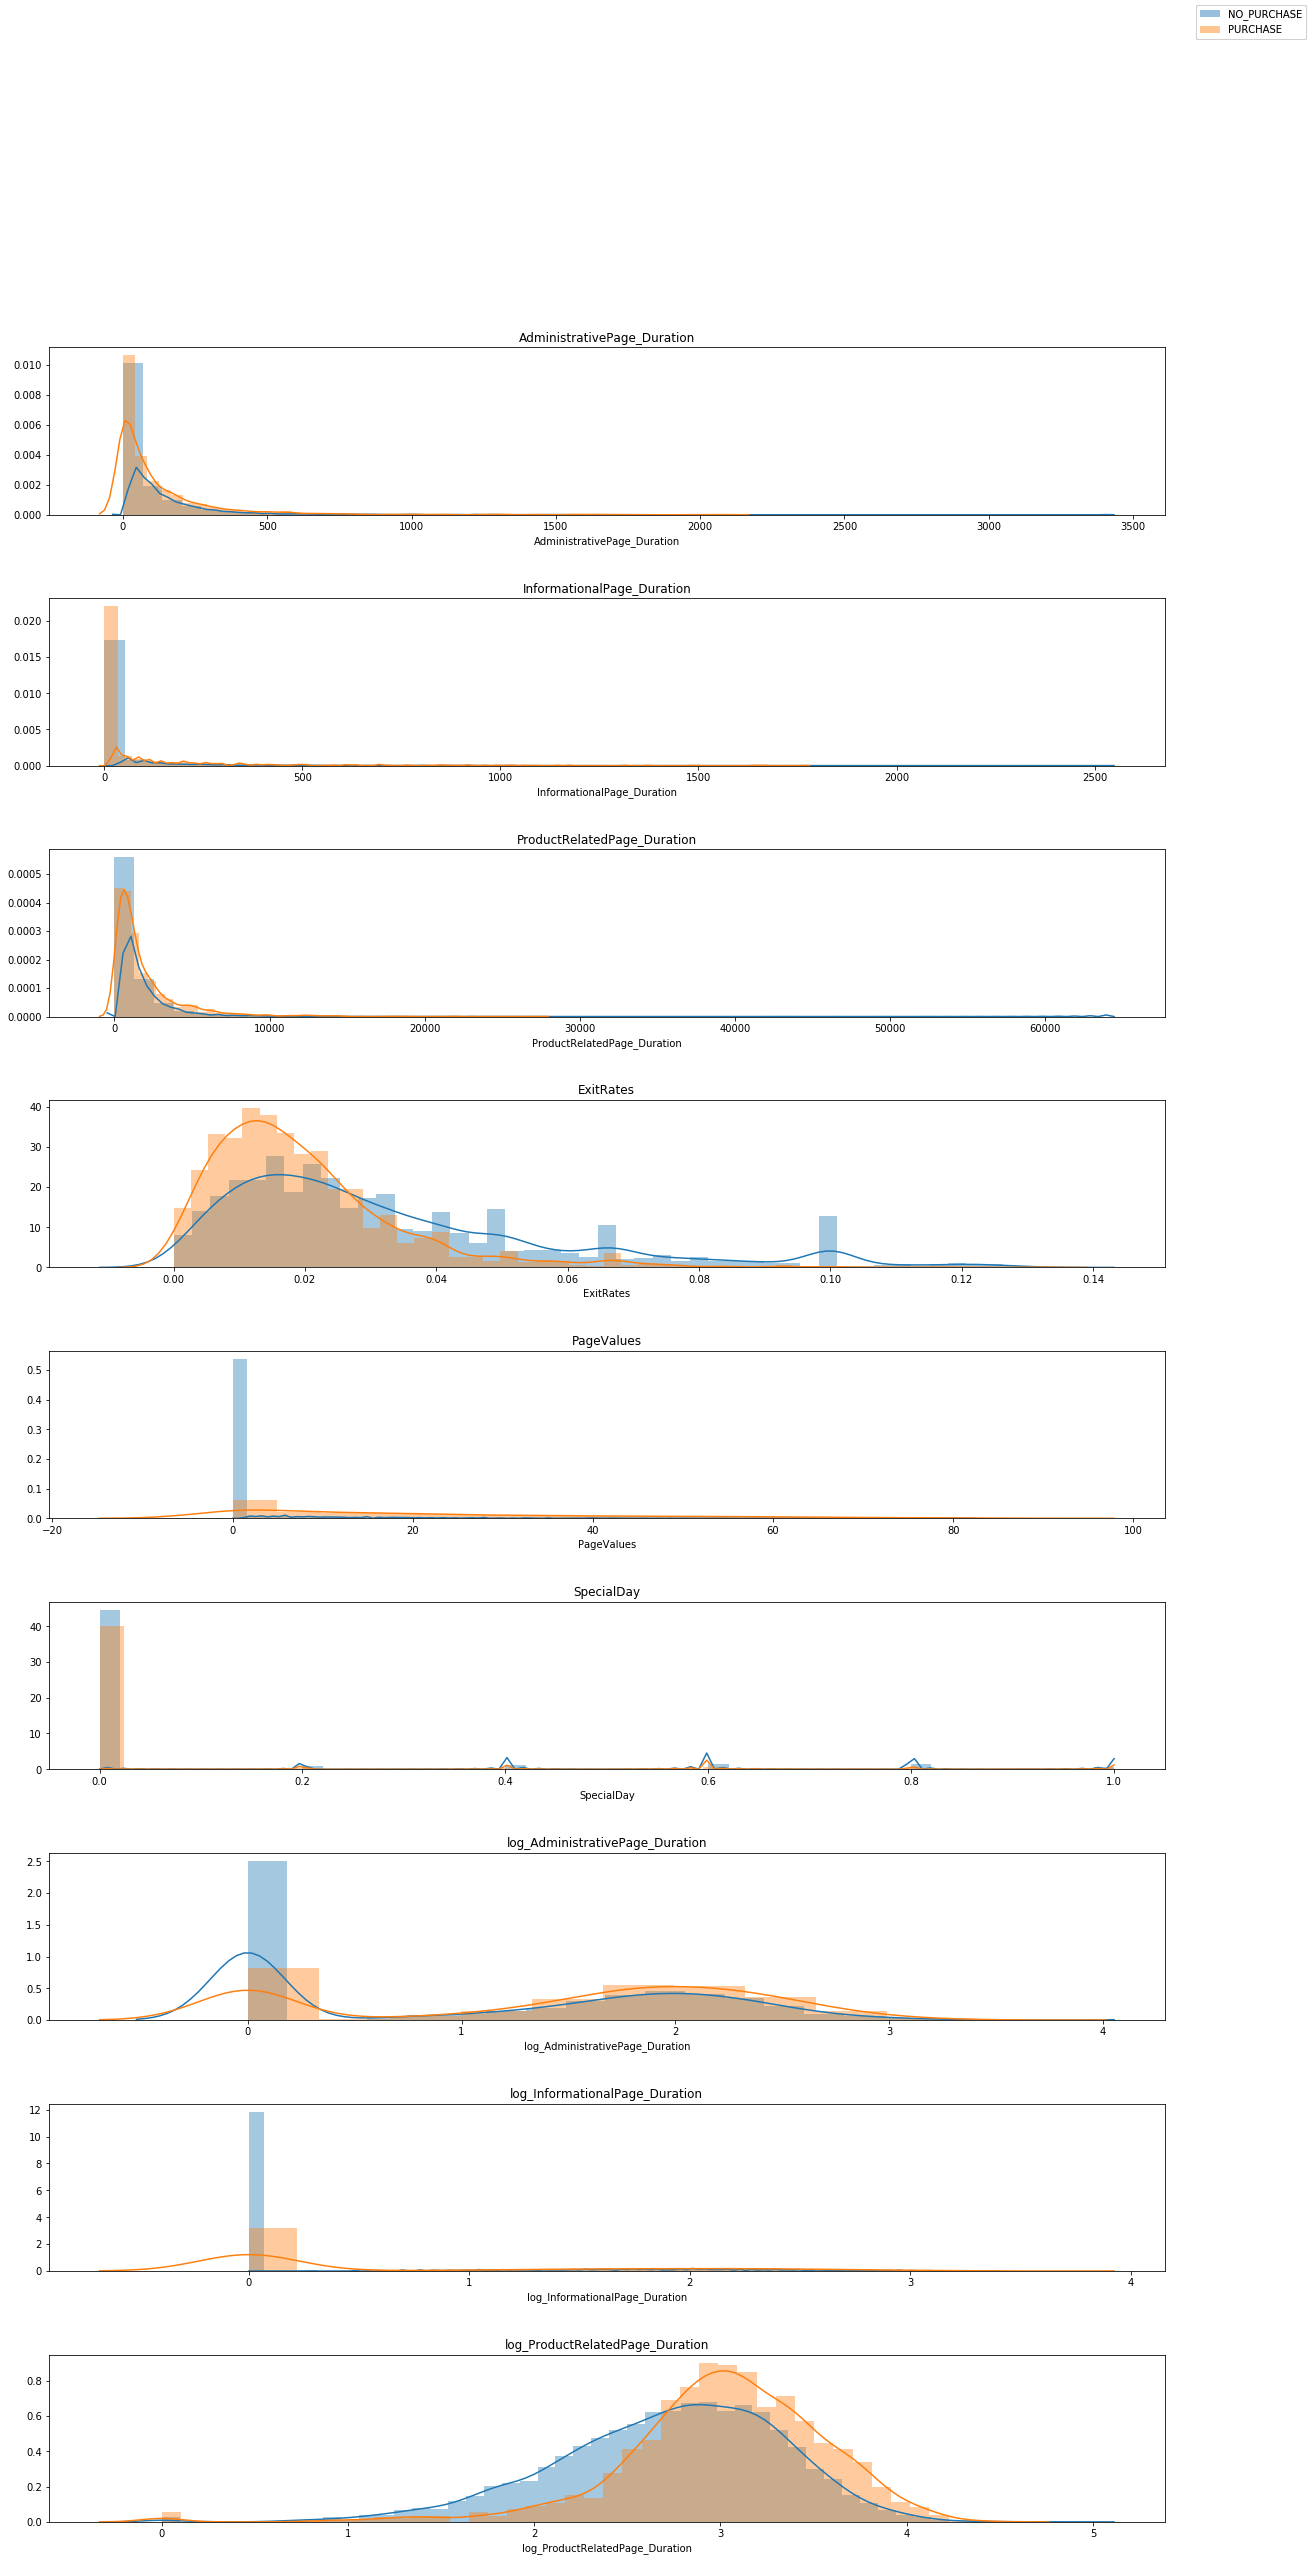

In [31]:
# Checking distributions after removing outliers:
plot_hist_numeric(numeric_column_names, final_df, 'Class')

Percentage of sessions in purchase class is 15.94 %
Percentage of sessions in no-purchase class is 84.06 %


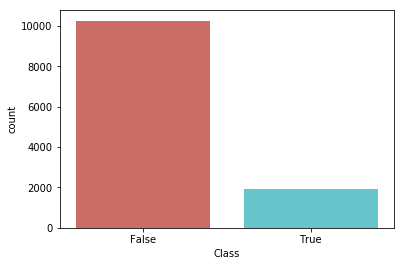

In [32]:
plot_class_distribution(final_df)

In [34]:
log_columns=[f'log_{col_name}' for col_name in duration_column_names]
final_df.drop(log_columns, axis=1, inplace=True)
final_df.head()

,AdministrativePage_Duration,InformationalPage_Duration,ProductRelatedPage_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Class
1,0.0,0.0,64.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0.0,0.0,627.500000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,154.216667,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0.0,0.0,37.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,738.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


**Encoding categorical data:**

In [35]:
# Encoding boolean values (Weekend and Revenue)
for column_name in bool_categ_column_names:
    final_df[column_name]=final_df[column_name].astype(int)
    
# Encoding categorical values represented as strings or integers
for column_name in categ_column_names:
    dummies_df = pd.get_dummies(final_df[column_name], prefix=column_name) 
    final_df.drop(column_name, inplace = True, axis = 1)
    final_df = pd.concat([final_df, dummies_df], axis = 1, sort = False)
    
print(final_df.columns.values)
# print(final_df)

['AdministrativePage_Duration' 'InformationalPage_Duration'
 'ProductRelatedPage_Duration' 'ExitRates' 'PageValues' 'SpecialDay'
 'Weekend' 'Class' 'OperatingSystems_1' 'OperatingSystems_2'
 'OperatingSystems_3' 'OperatingSystems_4' 'OperatingSystems_5'
 'OperatingSystems_6' 'OperatingSystems_7' 'OperatingSystems_8'
 'Browser_1' 'Browser_2' 'Browser_3' 'Browser_4' 'Browser_5' 'Browser_6'
 'Browser_7' 'Browser_8' 'Browser_9' 'Browser_10' 'Browser_11'
 'Browser_12' 'Browser_13' 'Region_1' 'Region_2' 'Region_3' 'Region_4'
 'Region_5' 'Region_6' 'Region_7' 'Region_8' 'Region_9' 'TrafficType_1'
 'TrafficType_2' 'TrafficType_3' 'TrafficType_4' 'TrafficType_5'
 'TrafficType_6' 'TrafficType_7' 'TrafficType_8' 'TrafficType_9'
 'TrafficType_10' 'TrafficType_11' 'TrafficType_12' 'TrafficType_13'
 'TrafficType_14' 'TrafficType_15' 'TrafficType_16' 'TrafficType_17'
 'TrafficType_18' 'TrafficType_19' 'TrafficType_20' 'Month_Aug'
 'Month_Dec' 'Month_Feb' 'Month_Jul' 'Month_June' 'Month_Mar' 'Month_Ma

In [36]:
final_df.to_csv('final_online_store_revenue.csv')

Y = final_df.Class
X = final_df.drop('Class', axis=1)

**Balancing sessions classes:**
Purchase sessions will be up-sampled using the **SMOTE** algorithm (Synthetic Minority Oversampling Technique). SMOTE algorithm, at the high level, works as follows:
* Creating synthetic samples from the minor class instead of creating copies;
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, new observations.

In [37]:
from imblearn.over_sampling import SMOTE

os_smote = SMOTE(random_state=0)
balanced_X, balanced_Y = os_smote.fit_sample(X, Y)
balanced_X = pd.DataFrame(data=balanced_X, columns=X.columns)
balanced_Y = pd.DataFrame(data=balanced_Y, columns=['Class'])

print('Length of oversampled data is ', len(balanced_X))
print('Number of no purchase in oversampled data', len(balanced_Y[balanced_Y['Class']==0]))
print('Number of purchase', len(balanced_Y[balanced_Y['Class']==1]))
print('Proportion of no purchase in oversampled data is ', len(balanced_Y[balanced_Y['Class']==0])/len(balanced_X))
print('Proportion of purchase data in oversampled data is ', len(balanced_Y[balanced_Y['Class']==1])/len(balanced_X))

Length of oversampled data is  18906
Number of no purchase in oversampled data 9453
Number of purchase 9453
Proportion of no purchase in oversampled data is  0.5
Proportion of purchase data in oversampled data is  0.5


## Classification
Using sklearn implementation of Logistic Regression classifier

**Model training:**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, x_test, Y_train, y_test = train_test_split(balanced_X, balanced_Y, test_size=0.3, random_state=0)
# X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
# log_reg.fit(balanced_X, balanced_Y)

y_pred = log_reg.predict(x_test)
log_reg_score=log_reg.score(x_test, y_test)

print('Mean accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg_score))

Mean accuracy of logistic regression classifier on test set: 0.82


**Model evaluation:**

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy score: 0.82

Confusion Matrix:

[[2489  329]
 [ 676 2178]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2818
           1       0.87      0.76      0.81      2854

    accuracy                           0.82      5672
   macro avg       0.83      0.82      0.82      5672
weighted avg       0.83      0.82      0.82      5672



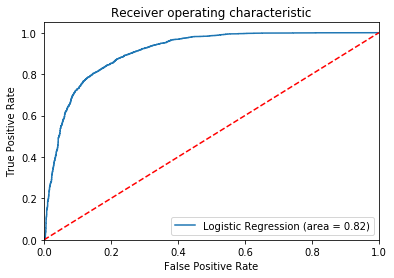

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()